## Import Necessary Packages
We utilized Pandas for data manuplation, NumPy for mathematical operations, and Matplotlib and Seaborn for data visualization.  



In [421]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Google Colab File Management

In [422]:
from google.colab import drive # connect colab to Drive
drive.mount('/content/drive', force_remount=True)
DATADIR = '/content/drive/My Drive/Rice Datathon 2024/Product Data/' # specify the directory to your data

Mounted at /content/drive


## Importing, Cleaning, and Transforming Data

In [423]:
# Import Data
df = pd.read_csv(DATADIR + 'CAERS_ProductBased.csv')
df.head(5) # prints out the top 5 entries of the dataset

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,Unnamed: 12
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,NaN
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me...",NaN
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN


In [424]:
# drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [425]:
# Drop unused columns
subset = df.drop(columns=['DATE_FDA_FIRST_RECEIVED_REPORT', 'REPORT_ID', 'PRODUCT', 'DATE_EVENT'])
subset

,PRODUCT_TYPE,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,SUSPECT,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event
1,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome
2,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me..."
3,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me..."
4,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other..."
...,...,...,...,...,...,...,...,...
206601,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P..."
206602,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization
206603,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room"
206604,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room"


In [426]:
# Find null values
subset.isna().sum()


PRODUCT_TYPE                       0
PRODUCT_CODE                       0
DESCRIPTION                        0
PATIENT_AGE                    67877
AGE_UNITS                      67877
SEX                             9310
CASE_MEDDRA_PREFERRED_TERMS        0
CASE_OUTCOME                       0
dtype: int64

In [427]:
# drop rows with null values
subset.dropna(subset=['PATIENT_AGE', 'SEX'], inplace=True)
subset.isna().sum()


PRODUCT_TYPE                   0
PRODUCT_CODE                   0
DESCRIPTION                    0
PATIENT_AGE                    0
AGE_UNITS                      0
SEX                            0
CASE_MEDDRA_PREFERRED_TERMS    0
CASE_OUTCOME                   0
dtype: int64

In [428]:
subset

,PRODUCT_TYPE,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,SUSPECT,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event
3,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me..."
5,SUSPECT,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio..."
6,SUSPECT,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event
7,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization"
...,...,...,...,...,...,...,...,...
206577,SUSPECT,53,Cosmetics,55.0,year(s),Male,"ASTHENIA, BURNING SENSATION, EYE PAIN, SINUS PAIN",Other Outcome
206581,SUSPECT,38,Soup,45.0,year(s),Female,"CHEST PAIN, DIZZINESS, DYSPNOEA, HYPOAESTHESIA...","Required Intervention, Visited Emergency Room"
206591,SUSPECT,16,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ..."
206593,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization"


In [429]:
# Drop concomitant values

subset = subset[subset['PRODUCT_TYPE'] != 'CONCOMITANT']
#subset[subset['PRODUCT_TYPE'] == 'CONCOMITANT'].shape[0]
#subset = subset.drop(columns=['PRODUCT_TYPE'])
subset

,PRODUCT_TYPE,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,SUSPECT,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event
3,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me..."
5,SUSPECT,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio..."
6,SUSPECT,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event
7,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization"
...,...,...,...,...,...,...,...,...
206577,SUSPECT,53,Cosmetics,55.0,year(s),Male,"ASTHENIA, BURNING SENSATION, EYE PAIN, SINUS PAIN",Other Outcome
206581,SUSPECT,38,Soup,45.0,year(s),Female,"CHEST PAIN, DIZZINESS, DYSPNOEA, HYPOAESTHESIA...","Required Intervention, Visited Emergency Room"
206591,SUSPECT,16,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ..."
206593,SUSPECT,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization"


In [430]:
subset['PRODUCT_TYPE'].value_counts()

SUSPECT    108754
Name: PRODUCT_TYPE, dtype: int64

In [431]:
# drop unnecessary columns
subset = subset.drop(columns=['PRODUCT_TYPE'])
subset = subset.drop(columns=['CASE_MEDDRA_PREFERRED_TERMS'])
subset

,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_OUTCOME
0,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,Other Serious or Important Medical Event
3,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Hospitalization, Other Serious or Important Me..."
5,29,Soft Drink/Water,65.0,year(s),Male,"Life Threatening, Hospitalization, Other Serio..."
6,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Other Serious or Important Medical Event
7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Death, Hospitalization"
...,...,...,...,...,...,...
206577,53,Cosmetics,55.0,year(s),Male,Other Outcome
206581,38,Soup,45.0,year(s),Female,"Required Intervention, Visited Emergency Room"
206591,16,Fishery/Seafood Prod,72.0,year(s),Female,"Visited Emergency Room, Visited a Health Care ..."
206593,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"Life Threatening, Hospitalization"


In [432]:
# Seperate input variables and target variables to two sequences
y = subset['PRODUCT_CODE']
X = subset.values[:, 2:6]
X

array([[45.0, 'year(s)', 'Male',
        'Other Serious or Important Medical Event'],
       [46.0, 'year(s)', 'Female',
        'Hospitalization, Other Serious or Important Medical Event'],
       [65.0, 'year(s)', 'Male',
        'Life Threatening, Hospitalization, Other Serious or Important Medical Event'],
       ...,
       [72.0, 'year(s)', 'Female',
        'Visited Emergency Room, Visited a Health Care Provider'],
       [50.0, 'year(s)', 'Female', 'Life Threatening, Hospitalization'],
       [65.0, 'year(s)', 'Male',
        'Required Intervention, Visited a Health Care Provider']],
      dtype=object)

In [433]:
subset['CASE_OUTCOME'].value_counts()

Other Serious or Important Medical Event                                                                                                 33419
Other Outcome                                                                                                                            12547
Death                                                                                                                                     9709
Hospitalization, Other Serious or Important Medical Event                                                                                 7945
Death, Other Serious or Important Medical Event                                                                                           6074
                                                                                                                                         ...  
Life Threatening, Hospitalization, Other Serious or Important Medical Event, Allergic Reaction                                               1

Standardizing Age Units

In [434]:
subset['AGE_UNITS'].value_counts()

year(s)      106050
month(s)       1698
decade(s)       423
day(s)          366
week(s)         217
Name: AGE_UNITS, dtype: int64

In [435]:
for i in range(len(X)):

# standardize all kind of ages into years
  if X[i][1] == 'day(s)':
    X[i][0] = X[i][0]/365
  elif X[i][1] == 'week(s)':
    X[i][0] = X[i][0]/52.1429
  elif X[i][1] == 'month(s)':
    X[i][0] = X[i][0]/12
  elif X[i][0] == 'decade(s)':
    X[i][0] = X[i][0]*10

  if X[i][2] == 'Male':
    X[i][2] = 1
  elif X[i][2] == 'Female':
    X[i][2] = 2
  else:
    X[i][2] = 0

# One-hot encode varying levels of diesase seriousness to each age and gender
  if 'Death' in X[i][3]:
    X[i][3] = 6
  elif 'Life Threatening' in X[i][3]:
    X[i][3] = 5
  elif 'Disab' in X[i][3]:
    X[i][3] = 4
  elif 'Emergency' in X[i][3]:
    X[i][3] = 3
  elif 'Serious' in X[i][3]:
    X[i][3] = 2
  elif 'Hospitalization' in X[i][3]:
    X[i][3] = 1
  else:
    X[i][3] = 0

In [436]:
# deleting age_units column to make our input variables for training and testing
X_subset = []

for i in range(len(X)):
  X_subset.append([X[i][0], X[i][2], X[i][3]])

## Machine Learning Model Setup, Training, and Predicting
We utilized scikit-learn to implement a decision tree machine learning algorithm. We utilized this model to predict different demographic's suspectibility to certain consumer products.

In [437]:
# import scikitlearn to split training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2)

In [438]:
# import scikitlearn to implement decision tree model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [439]:
# load predictions
predictions = clf.predict(X_test)

In [440]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6861293733621443

In [441]:
# Transform age, seriousness, and prediction data for visualization
# Male data

product_code1 = []
age_list = []
serious_list = []
for j in range(100):
  for i in range(7):
    product_code1.append([float(j),1,i])
    age_list.append(j)
    serious_list.append(i)
predictions1 = clf.predict(product_code1)

print(predictions1)
print(age_list)
print(serious_list)


['54' '54' '54' '40P' '40' '54' '54' '40' '3' '40' '40' '20' '54' '40' '3'
 '23' '54' '54' '25' '54' '41' '3' '54' '54' '54' '23' '3' '54' '3' '54'
 '54' '54' '45' '3' '23' '3' '54' '54' '34' '23' '3' '23' '3' '54' '54'
 '23' '3' '3' '53' '23' '16' '54' '54' '23' '54' '53' '23' '23' '54' '3'
 '29' '41' '53' '23' '3' '3' '54' '25' '54' '25' '3' '3' '54' '4' '23' '3'
 '25' '33' '54' '54' '33' '2' '37' '25' '3' '29' '3' '54' '23' '3' '33'
 '3' '54' '54' '54' '23' '54' '33' '29' '14' '54' '3' '29' '54' '54' '23'
 '54' '54' '54' '5' '54' '54' '54' '54' '54' '54' '29' '54' '54' '54' '41'
 '54' '54' '23' '54' '54' '54' '54' '54' '54' '54' '54' '54' '53' '54'
 '54' '54' '54' '54' '54' '53' '54' '54' '54' '53' '54' '54' '54' '54'
 '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54'
 '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54'
 '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54'
 '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' 

In [442]:
# Transform age, seriousness, and prediction data for visualization
# Female Data

product_code2 = []
age_list = []
serious_list = []
for j in range(100):
  for i in range(7):
    product_code2.append([float(j),2,i])
    age_list.append(j)
    serious_list.append(i)
predictions2 = clf.predict(product_code2)
print(predictions2)
print(age_list)
print(serious_list)

['53' '53' '24' '53' '53' '54' '40' '40' '40P' '54' '53' '40P' '7' '40P'
 '53' '54' '54' '53' '16' '5' '40P' '53' '54' '54' '54' '9' '3' '54' '53'
 '54' '53' '3' '5' '3' '53' '53' '54' '53' '14' '23' '3' '53' '3' '16'
 '53' '23' '33' '3' '53' '53' '54' '53' '29' '5' '3' '53' '53' '28' '53'
 '53' '23' '30' '53' '53' '54' '53' '54' '5' '3' '53' '53' '3' '53' '54'
 '24' '3' '53' '53' '34' '54' '54' '5' '54' '53' '53' '53' '53' '3' '5'
 '12' '53' '53' '54' '54' '3' '45' '54' '53' '53' '54' '53' '54' '23' '3'
 '53' '53' '54' '53' '54' '5' '34' '54' '53' '54' '54' '53' '53' '41' '53'
 '53' '54' '53' '54' '5' '54' '53' '53' '54' '53' '54' '5' '54' '53' '53'
 '54' '53' '54' '54' '54' '53' '53' '54' '53' '54' '53' '54' '53' '53'
 '54' '53' '54' '53' '54' '53' '53' '54' '53' '54' '54' '54' '53' '53'
 '54' '53' '54' '54' '54' '53' '53' '54' '53' '54' '54' '54' '53' '53'
 '54' '53' '54' '54' '54' '53' '53' '54' '53' '54' '53' '54' '53' '53'
 '54' '53' '54' '54' '54' '53' '53' '54' '53' '54' '54' '

In [443]:
# Transform age, seriousness, and prediction data for visualization
# Unknown gender data

product_code3 = []
age_list = []
serious_list = []
for j in range(100):
  for i in range(7):
    product_code3.append([float(j),0,i])
    age_list.append(j)
    serious_list.append(i)
predictions3 = clf.predict(product_code3)
print(predictions3)
print(age_list)
print(serious_list)

['54' '54' '54' '40P' '40' '54' '54' '40' '3' '40' '40' '20' '54' '40P'
 '3' '23' '54' '54' '25' '54' '40P' '3' '54' '54' '54' '23' '3' '54' '3'
 '54' '54' '54' '45' '34' '23' '3' '54' '54' '34' '23' '3' '23' '3' '54'
 '54' '23' '3' '3' '53' '23' '16' '54' '54' '23' '54' '53' '23' '23' '54'
 '3' '29' '41' '53' '23' '3' '3' '54' '25' '54' '25' '3' '3' '54' '4' '23'
 '3' '25' '33' '54' '54' '33' '2' '37' '25' '3' '29' '3' '54' '23' '3'
 '33' '3' '54' '54' '54' '23' '54' '33' '29' '14' '54' '3' '29' '54' '54'
 '23' '54' '53' '54' '5' '54' '54' '54' '54' '53' '54' '29' '54' '54' '54'
 '41' '53' '54' '23' '54' '54' '54' '54' '53' '54' '54' '54' '54' '53'
 '54' '53' '54' '23' '54' '54' '53' '54' '53' '54' '23' '23' '54' '54'
 '54' '53' '54' '23' '23' '54' '54' '54' '53' '54' '23' '23' '54' '54'
 '54' '53' '54' '23' '23' '54' '54' '54' '53' '54' '23' '23' '54' '53'
 '54' '54' '54' '23' '23' '54' '53' '54' '54' '54' '23' '23' '54' '53'
 '54' '54' '54' '23' '54' '54' '53' '54' '54' '54' '23' '5

In [444]:
# transform data into dataframes for visualization

result_df_male = pd.DataFrame(zip(age_list, predictions1, serious_list), columns=['age', 'product_code', 'seriousness'])
result_df_female = pd.DataFrame(zip(age_list, predictions2, serious_list), columns=['age', 'product_code', 'seriousness'])
result_df_unknown = pd.DataFrame(zip(age_list, predictions3, serious_list), columns=['age', 'product_code', 'seriousness'])
print(result_df_male)
print(result_df_female)
print(result_df_unknown)


     age product_code  seriousness
0      0           54            0
1      0           54            1
2      0           54            2
3      0          40P            3
4      0           40            4
..   ...          ...          ...
695   99           54            2
696   99           54            3
697   99           41            4
698   99           54            5
699   99           54            6

[700 rows x 3 columns]
     age product_code  seriousness
0      0           53            0
1      0           53            1
2      0           24            2
3      0           53            3
4      0           53            4
..   ...          ...          ...
695   99           54            2
696   99           41            3
697   99           54            4
698   99           54            5
699   99           54            6

[700 rows x 3 columns]
     age product_code  seriousness
0      0           54            0
1      0           54            1
2      

## Visualization
We utilized Seaborn for visualization.

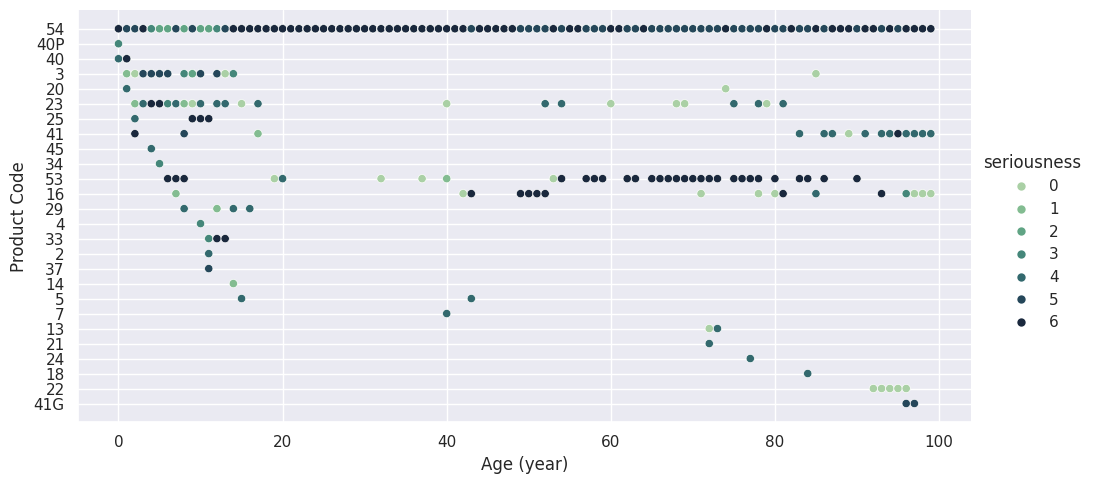

In [445]:
# Male data visualization
sns.set_theme(style="darkgrid")
plot = sns.relplot(data=result_df_male, x="age", y="product_code", hue="seriousness", palette="ch:r=-.5,l=.75", aspect=2)
plot.set_axis_labels("Age (year)", "Product Code")


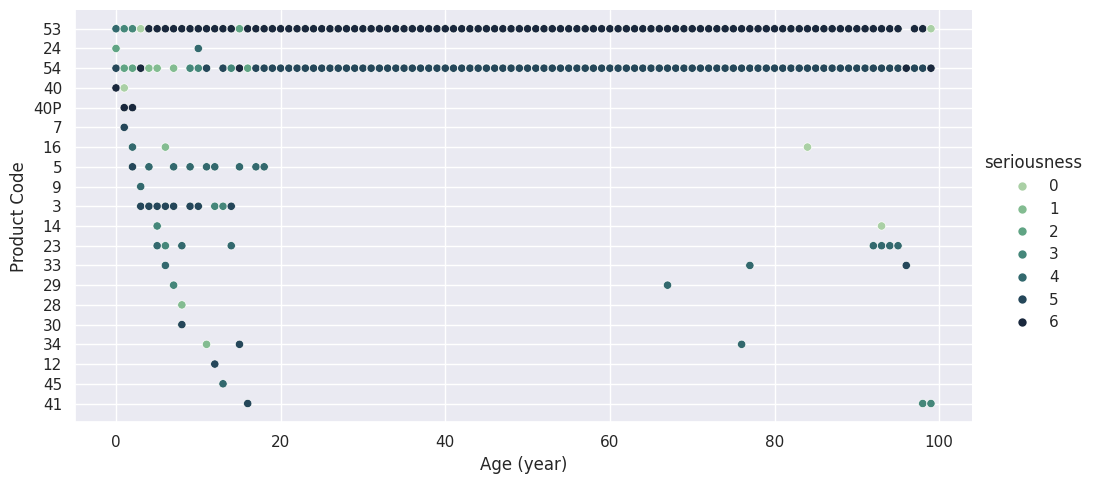

In [446]:
# Female data visualization
sns.set_theme(style="darkgrid")
plot = sns.relplot(data=result_df_female, x="age", y="product_code", hue="seriousness", palette="ch:r=-.5,l=.75", aspect=2)
plot.set_axis_labels("Age (year)", "Product Code")

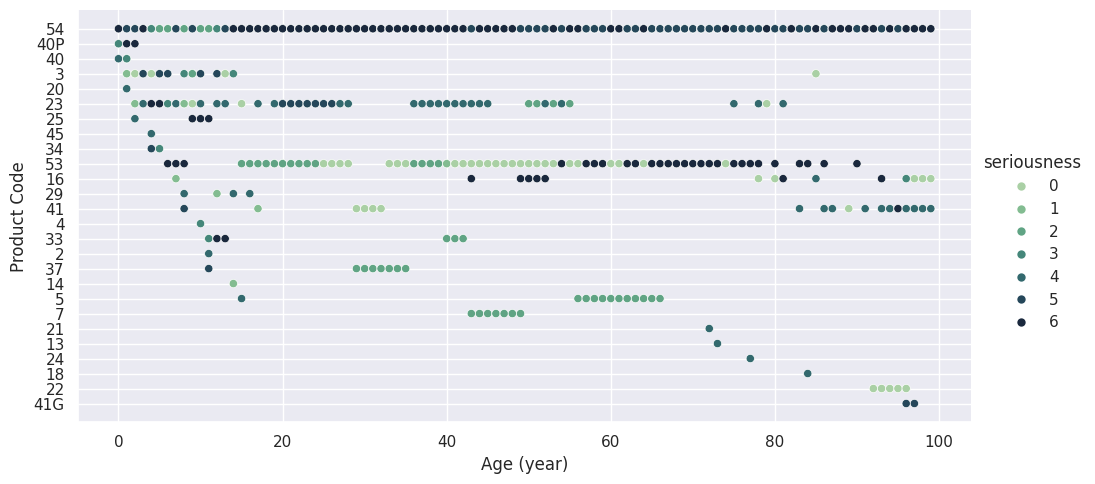

In [447]:
# Unknown data visualization
sns.set_theme(style="darkgrid")
plot = sns.relplot(data=result_df_unknown, x="age", y="product_code", hue="seriousness", palette="ch:r=-.5,l=.75", aspect=2)
plot.set_axis_labels("Age (year)", "Product Code")